In [1]:
# Standard Library Imports
import re
import warnings
import logging

# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from matplotlib.font_manager import FontProperties

# Text Processing
import nltk
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from urlextract import URLExtract
from tqdm import tqdm

# Machine Learning - Model Selection and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Machine Learning - Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier, SGDClassifier, Perceptron

# Suppressing Warnings
warnings.filterwarnings('ignore')

In [2]:
main_data = pd.read_csv("../../../Data/English/3. Preprocessed/preprocessed_english_sms.csv")
synthetic_data = pd.read_csv("../../../Data/English/3. Preprocessed/preprocessed_synthetic_english_sms_gemini.csv")

In [3]:
# Splitting the test set from main_data
train_data, test_data = train_test_split(main_data, test_size=0.2, random_state=42, stratify=main_data['Class'])

# Merging the remaining main_data (train_data) with synthetic_data
combined_data = pd.concat([train_data, synthetic_data], ignore_index=True)

# Shuffling the combined dataset
combined_data = combined_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Displaying the shapes of the datasets
print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"Combined data shape: {combined_data.shape}")

Train data shape: (4135, 6)
Test data shape: (1034, 6)
Combined data shape: (6185, 6)


In [4]:
combined_data.to_csv('../../../Data/English/4. Combined/combined_english_sms_gemini.csv', index=False)

In [5]:
train_data = pd.read_csv("../../../Data/English/4. Combined/combined_english_sms_gemini.csv")

In [6]:
train_data

,Class,Text,NO_words,NO_characters,NO_sentences,Tokens
0,ham,hear back job applic yet finger cross,13,65,2,"['hear', 'back', 'job', 'applic', 'yet', 'fing..."
1,ham,6 ft good combin,11,41,1,"['6', 'ft', 'good', 'combin']"
2,ham,mom made famou appl pie today absolut divin co...,22,92,3,"['mom', 'made', 'famou', 'appl', 'pie', 'today..."
3,spam,get 50 next meal restaur name show thi text,17,64,2,"['get', '50', 'next', 'meal', 'restaur', 'name..."
4,spam,youv preselect chanc win luxuri getaway repli ...,19,86,2,"['youv', 'preselect', 'chanc', 'win', 'luxuri'..."
...,...,...,...,...,...,...
6180,ham,onli doe simpl arithmet percentag,8,47,1,"['onli', 'doe', 'simpl', 'arithmet', 'percentag']"
6181,spam,hey saw like hike pic check gearup 50 sale out...,25,123,3,"['hey', 'saw', 'like', 'hike', 'pic', 'check',..."
6182,ham,forgot tell mom visit next week need help gues...,18,76,2,"['forgot', 'tell', 'mom', 'visit', 'next', 'we..."
6183,ham,hey finish report im swamp,12,45,2,"['hey', 'finish', 'report', 'im', 'swamp']"


In [7]:
# Replace text labels 'ham' and 'spam' with 0 and 1 in the 'Class' column for both train and test datasets
train_data["Class"].replace({"ham": 0, "spam": 1}, inplace=True)
test_data["Class"].replace({"ham": 0, "spam": 1}, inplace=True)

#  Handle missing values in the 'Text' column
train_data['Text'] = train_data['Text'].fillna('')  # Replace NaN with an empty string
test_data['Text'] = test_data['Text'].fillna('')    # Replace NaN with an empty string

In [8]:
# Text Vectorization using TF-IDF for the 'Text' Column
# Vectorizing the training and testing data
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))



# Fit the vectorizer on the training data and transform both training and testing data
X_train = tfidf_vectorizer.fit_transform(train_data['Text'])
X_test = tfidf_vectorizer.transform(test_data['Text'])

# Extract the labels
Y_train = train_data['Class']
Y_test = test_data['Class']

In [9]:
# Classifier models
svm = SVC(kernel='sigmoid', gamma=1.0, class_weight='balanced')
knn = KNeighborsClassifier()
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()
dt = DecisionTreeClassifier(max_depth=5)
lr = LogisticRegression(solver='liblinear', penalty='l2', class_weight='balanced')
rf = RandomForestClassifier(n_estimators=50, random_state=2, class_weight='balanced')
ada = AdaBoostClassifier(n_estimators=50, random_state=2)
bagging = BaggingClassifier(n_estimators=50, random_state=2)
et = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2, tree_method='gpu_hist')
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
ridge = RidgeClassifier()
sgd = SGDClassifier(max_iter=1000, tol=1e-3, random_state=2)
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=2)


In [10]:
# Add models to the dictionary
models = {
    'SVM': svm,
    'KNN': knn,
    'MultinomialNB': mnb,
    'GaussianNB': gnb,
    'BernoulliNB': bnb,
    'DT': dt,
    'LR': lr,
    'RF': rf,
    'AdaBoost': ada,
    'Bagging': bagging,
    'ExtraTrees': et,
    'GBDT': gbdt,
    'XGB': xgb,
    'LDA': lda,
    'QDA': qda,
    'Ridge': ridge,
    'SGD': sgd,
    'Perceptron': perceptron
}

In [11]:
def train_classifier(model, X_train, Y_train, X_test, Y_test, dense_data=None):
    # Use precomputed dense data if provided
    if isinstance(model, (GaussianNB, QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis)):
        if dense_data is None:
            print(f"Converting sparse data to dense for {type(model).__name__}")
            X_train = X_train.toarray()
            X_test = X_test.toarray()
        else:
            X_train, X_test = dense_data
    
    # Train the model
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average='binary')
    recall = recall_score(Y_test, y_pred, average='binary')
    f1 = f1_score(Y_test, y_pred, average='binary')
    return accuracy, precision, recall, f1, y_pred

In [12]:
# Enable logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Train models sequentially
results = []
for name, model in models.items():
    try:
        accuracy, precision, recall, f1, y_pred = train_classifier(model, X_train, Y_train, X_test, Y_test)
        results.append((name, accuracy, precision, recall, f1))
    except Exception as e:
        logger.error(f"Error occurred while training model {name}: {e}")

# Log final results
logger.info("\nFinal Results:")
for name, accuracy, precision, recall, f1 in results:
    logger.info(f"{name}: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1 Score={f1:.4f}")

Converting sparse data to dense for GaussianNB
Converting sparse data to dense for LinearDiscriminantAnalysis
Converting sparse data to dense for QuadraticDiscriminantAnalysis


INFO:__main__:
Final Results:
INFO:__main__:SVM: Accuracy=0.9710, Precision=0.8633, Recall=0.9160, F1 Score=0.8889
INFO:__main__:KNN: Accuracy=0.8926, Precision=1.0000, Recall=0.1527, F1 Score=0.2649
INFO:__main__:MultinomialNB: Accuracy=0.9681, Precision=0.9623, Recall=0.7786, F1 Score=0.8608
INFO:__main__:GaussianNB: Accuracy=0.9004, Precision=0.5693, Recall=0.8779, F1 Score=0.6907
INFO:__main__:BernoulliNB: Accuracy=0.9584, Precision=1.0000, Recall=0.6718, F1 Score=0.8037
INFO:__main__:DT: Accuracy=0.9284, Precision=0.7111, Recall=0.7328, F1 Score=0.7218
INFO:__main__:LR: Accuracy=0.9642, Precision=0.8406, Recall=0.8855, F1 Score=0.8625
INFO:__main__:RF: Accuracy=0.9613, Precision=0.9789, Recall=0.7099, F1 Score=0.8230
INFO:__main__:AdaBoost: Accuracy=0.9072, Precision=0.8070, Recall=0.3511, F1 Score=0.4894
INFO:__main__:Bagging: Accuracy=0.9468, Precision=0.8276, Recall=0.7328, F1 Score=0.7773
INFO:__main__:ExtraTrees: Accuracy=0.9758, Precision=0.9818, Recall=0.8244, F1 Score=0.89

In [13]:
# Create a DataFrame to store and compare the accuracy, precision, recall, and F1 scores of the different algorithms
performance_df = pd.DataFrame({
    'Algorithm': [name for name, _, _, _, _ in results],
    'Accuracy': [accuracy for _, accuracy, _, _, _ in results],
    'Precision': [precision for _, _, precision, _, _ in results],
    'Recall': [recall for _, _, _, recall, _ in results],
    'F1 Score': [f1 for _, _, _, _, f1 in results]
})

.
.
.
.
### lets sort the sort the results by 'F1 Score' in descending order

In [14]:
# Sort the DataFrame by 'F1 Score' in descending order
performance_df = performance_df.sort_values('F1 Score', ascending=False)

# Reset the index to ensure it is sequential
performance_df = performance_df.reset_index(drop=True)

In [15]:
performance_df

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,Ridge,0.975822,0.920635,0.885496,0.902724
1,SGD,0.973888,0.893939,0.900763,0.897338
2,ExtraTrees,0.975822,0.981818,0.824427,0.896266
3,SVM,0.970986,0.863309,0.916031,0.888889
4,LDA,0.970986,1.000000,0.770992,0.870690
5,LR,0.964217,0.840580,0.885496,0.862454
6,Perceptron,0.961315,0.789809,0.946565,0.861111
7,MultinomialNB,0.968085,0.962264,0.778626,0.860759
8,RF,0.961315,0.978947,0.709924,0.823009
9,XGB,0.956480,0.913462,0.725191,0.808511


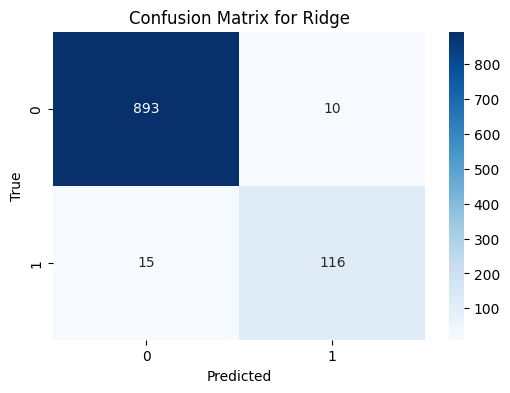

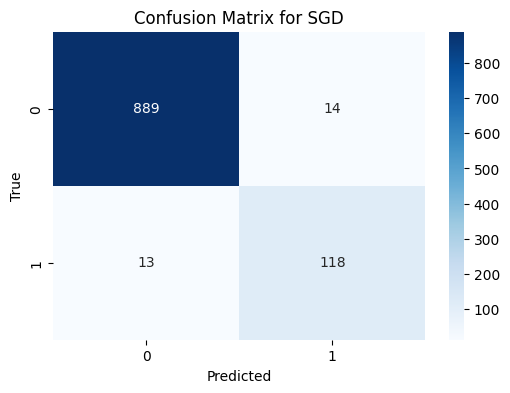

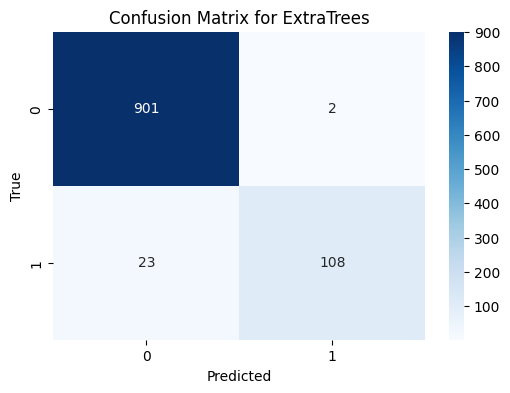

In [16]:
# Plot confusion matrices for top 3 models
top_models = performance_df.head(3)['Algorithm']
for name in top_models:
    model = models[name]
    _, _, _, _, y_pred = train_classifier(model, X_train, Y_train, X_test, Y_test)
    cm = confusion_matrix(Y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

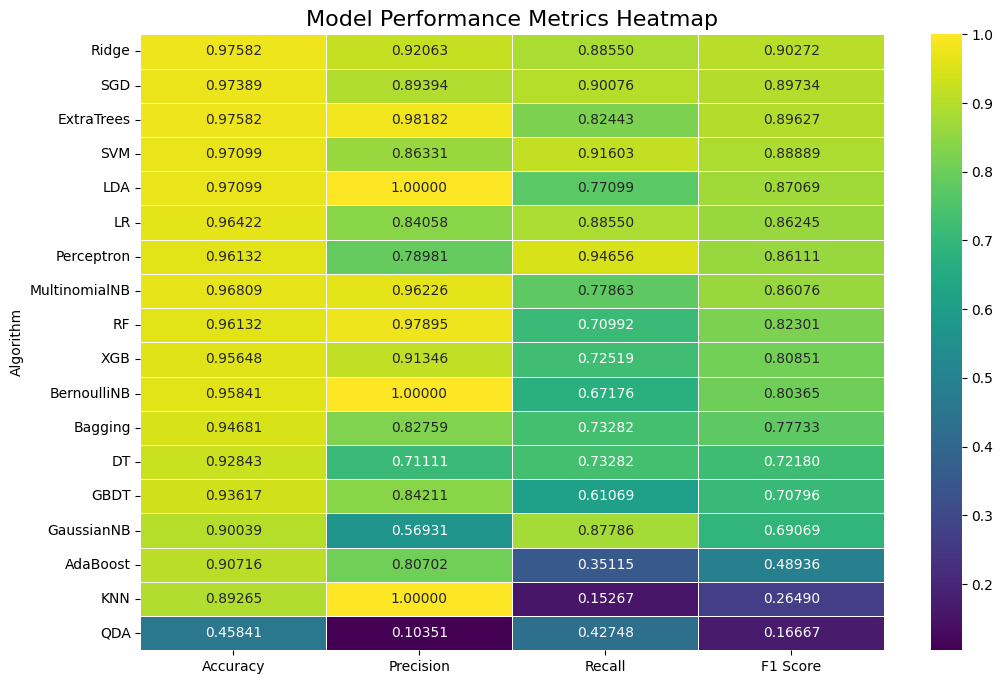

In [17]:
#  Heatmap
plt.figure(figsize=(12, 8))
metrics = performance_df.set_index('Algorithm')[['Accuracy', 'Precision', 'Recall', 'F1 Score']]
sns.heatmap(metrics, annot=True, cmap='viridis', fmt=".5f", linewidths=0.5)
plt.title('Model Performance Metrics Heatmap', fontsize=16)

# Save the chart as an image
plt.savefig('Results/Train_combined_english_sms_gemini/heatmap_model_performance_chart.png', dpi=600, bbox_inches='tight')

# Show the chart
plt.show()

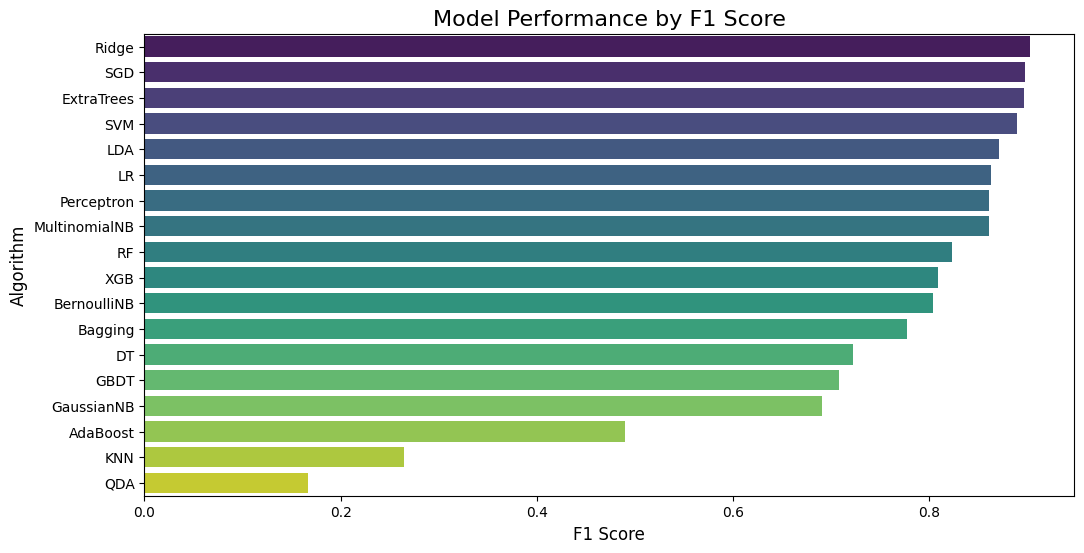

In [18]:
# Bar plot for F1 Score
plt.figure(figsize=(12, 6))
sns.barplot(x='F1 Score', y='Algorithm', data=performance_df, palette='viridis')
plt.title('Model Performance by F1 Score', fontsize=16)
plt.xlabel('F1 Score', fontsize=12)
plt.ylabel('Algorithm', fontsize=12)

# Save the chart as an image
plt.savefig('Results/Train_combined_english_sms_gemini/barplot_model_performance.png', dpi=600, bbox_inches='tight')

# Show the chart
plt.show()